# Pre-processing images

In [4]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
num_images=int(input("Enter the number of images required for pre-processing"))
print(f"Preprocessing {num_images} from each category...")


# get all the directory paths
dir_paths = os.listdir('ASL\\input\\asl_alphabet_train\\asl_alphabet_train')
dir_paths.sort()
root_path = 'ASL\\input\\asl_alphabet_train\\asl_alphabet_train'


# get --num-images images from each category
for idx, dir_path  in tqdm(enumerate(dir_paths), total=len(dir_paths)):
    all_images = os.listdir(f"{root_path}/{dir_path}")
    os.makedirs(f"ASL/input/preprocessed_image/{dir_path}", exist_ok=True)
    for i in range(num_images): # how many images to preprocess for each category
        # generate a random id between 0 and 2999
        rand_id = (random.randint(0, 2999))
        image = cv2.imread(f"{root_path}/{dir_path}/{all_images[rand_id]}")
        image = cv2.resize(image, (224, 224))
        cv2.imwrite(f"ASL/input/preprocessed_image/{dir_path}/{dir_path}{i}.jpg", image)
print('DONE')


  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

Preprocessing 1200 from each category...


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [06:59<00:00, 14.46s/it]

DONE


# Creating a csv file with labels and path

In [5]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm
from imutils import paths
# get all the image paths
image_paths = list(paths.list_images('ASL\\input\\preprocessed_image'))
# create a DataFrame 
data = pd.DataFrame()
labels = []
for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
    label = image_path.split(os.path.sep)[-2]
    # save the relative path for mapping image to target
    data.loc[i, 'image_path'] = image_path
    labels.append(label)
labels = np.array(labels)
# one hot encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"The first one hot encoded labels: {labels[0]}")
print(f"Mapping the first one hot encoded label to its category: {lb.classes_[0]}")
print(f"Total instances: {len(labels)}")
for i in range(len(labels)):
    index = np.argmax(labels[i])
    data.loc[i, 'target'] = int(index)
# shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)
# save as CSV file
data.to_csv('ASL/input/data.csv', index=False)
# pickle the binarized labels
print('Saving the binarized labels as pickled file')
joblib.dump(lb, 'ASL/output/lb.pkl')
print(data.head(5))



100%|███████████████████████████████████████████████████████████████████████████| 34800/34800 [01:10<00:00, 496.02it/s]


The first one hot encoded labels: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Mapping the first one hot encoded label to its category: A
Total instances: 34800
Saving the binarized labels as pickled file
                                 image_path  target
0   ASL\input\preprocessed_image\I\I340.jpg     8.0
1  ASL\input\preprocessed_image\P\P1195.jpg    15.0
2   ASL\input\preprocessed_image\X\X624.jpg    23.0
3   ASL\input\preprocessed_image\H\H682.jpg     7.0
4   ASL\input\preprocessed_image\E\E714.jpg     4.0


# Training the CNN model

Enter the number of epochs10


  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Computation device: cpu
Training on 29580 images
Validationg on 5220 images
CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=29, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
277,949 total parameters.
277,949 training parameters.
Epoch 1 of 10
Training


<ipython-input-8-c88712b1a157>:94: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return torch.tensor(image, dtype=torch.float), torch.tensor(label, dtype=torch.long)
925it [29:07,  1.89s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0403, Train Acc: 60.28
Validating


164it [02:42,  1.01it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0144, Val Acc: 85.13
Epoch 2 of 10
Training


925it [21:08,  1.37s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0071, Train Acc: 92.85
Validating


164it [01:52,  1.46it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0038, Val Acc: 96.02
Epoch 3 of 10
Training


925it [22:06,  1.43s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0033, Train Acc: 96.68
Validating


164it [01:50,  1.49it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0030, Val Acc: 97.05
Epoch 4 of 10
Training


925it [18:49,  1.22s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0023, Train Acc: 97.72
Validating


164it [01:41,  1.62it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0015, Val Acc: 98.51
Epoch 5 of 10
Training


925it [19:09,  1.24s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0018, Train Acc: 98.34
Validating


164it [01:51,  1.47it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0044, Val Acc: 95.88
Epoch 6 of 10
Training


925it [22:01,  1.43s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0017, Train Acc: 98.40
Validating


164it [01:49,  1.50it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0027, Val Acc: 96.84
Epoch 7 of 10
Training


925it [20:45,  1.35s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0015, Train Acc: 98.58
Validating


164it [01:40,  1.64it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0048, Val Acc: 95.71
Epoch 8 of 10
Training


925it [19:51,  1.29s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0014, Train Acc: 98.78
Validating


164it [02:07,  1.29it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0009, Val Acc: 98.85
Epoch 9 of 10
Training


925it [23:45,  1.54s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0009, Train Acc: 99.23
Validating


164it [02:03,  1.33it/s]                                                                                               
  0%|                                                                                          | 0/924 [00:00<?, ?it/s]

Val Loss: 0.0005, Val Acc: 99.48
Epoch 10 of 10
Training


925it [23:11,  1.50s/it]                                                                                               
  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

Train Loss: 0.0012, Train Acc: 98.93
Validating


164it [01:50,  1.48it/s]                                                                                               


Val Loss: 0.0046, Val Acc: 96.99


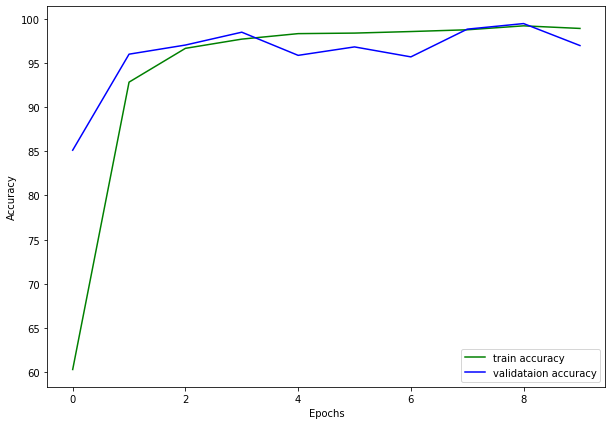

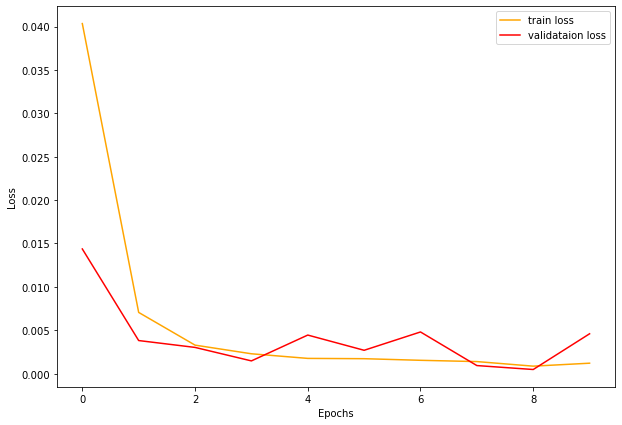

Saving model...


In [8]:
import pandas as pd
import joblib
import numpy as np
import torch
import random
import albumentations
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import time
import cv2
import cnn_models
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader


num_epoch=int(input("Enter the number of epochs"))
''' SEED Everything '''
def seed_everything(SEED=42):
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True 
SEED=42
seed_everything(SEED=SEED)
''' SEED Everything '''
# set computation device
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}")


# ### Reading and preparing train and validation set

# read the data.csv file and get the image paths and labels
df = pd.read_csv('ASL/input/data.csv')
X = df.image_path.values
y = df.target.values
(xtrain, xtest, ytrain, ytest) = (train_test_split(X, y, 
                                test_size=0.15, random_state=42))
print(f"Training on {len(xtrain)} images")
print(f"Validationg on {len(xtest)} images")


# ###custom dataset module

# image dataset module
class ASLImageDataset(Dataset):
    def __init__(self, path, labels):
        self.X = path
        self.y = labels
        # apply augmentations
        self.aug = albumentations.Compose([
            albumentations.Resize(224, 224, always_apply=True),
        ])
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        image = cv2.imread(self.X[i])
        image = self.aug(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
        label = self.y[i]
        return torch.tensor(image, dtype=torch.float), torch.tensor(label, dtype=torch.long)

train_data = ASLImageDataset(xtrain, ytrain)
test_data = ASLImageDataset(xtest, ytest)
 
# dataloaders
trainloader = DataLoader(train_data, batch_size=32, shuffle=True)
testloader = DataLoader(test_data, batch_size=32, shuffle=False)


# ### preparing our neural network

# model = models.MobineNetV2(pretrained=True, requires_grad=False)
model = cnn_models.CustomCNN().to(device)
print(model)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")


# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
# loss function
criterion = nn.CrossEntropyLoss()


# training function
def fit(model, dataloader):
    print('Training')
    model.train()
    running_loss = 0.0
    running_correct = 0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        running_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
        
    train_loss = running_loss/len(dataloader.dataset)
    train_accuracy = 100. * running_correct/len(dataloader.dataset)
    
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}")
    
    return train_loss, train_accuracy


#validation function
def validate(model, dataloader):
    print('Validating')
    model.eval()
    running_loss = 0.0
    running_correct = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(test_data)/dataloader.batch_size)):
            data, target = data[0].to(device), data[1].to(device)
            outputs = model(data)
            loss = criterion(outputs, target)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            running_correct += (preds == target).sum().item()
        
        val_loss = running_loss/len(dataloader.dataset)
        val_accuracy = 100. * running_correct/len(dataloader.dataset)
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}')
        
        return val_loss, val_accuracy


train_loss , train_accuracy = [], []
val_loss , val_accuracy = [], []
start = time.time()
for epoch in range(num_epoch):
    print(f"Epoch {epoch+1} of {num_epoch}")
    train_epoch_loss, train_epoch_accuracy = fit(model, trainloader)
    val_epoch_loss, val_epoch_accuracy = validate(model, testloader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
end = time.time()

# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ASL/output/accuracy.png')
plt.show()
 
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ASL/output/loss.png')
plt.show()
# save the model to disk
print('Saving model...')
torch.save(model.state_dict(), 'ASL/output/model.pth')




# Testing the Model

In [1]:
import matplotlib.pyplot as plt
import torch
import joblib
import torch.nn as nn
import numpy as np
import cv2
import albumentations
import torch.nn.functional as F
import time
import cnn_models

test_img=str(input("Enter the path of test image :"))


aug = albumentations.Compose([
                albumentations.Resize(224, 224, always_apply=True),
])

# load label binarizer
lb = joblib.load('ASL/output/lb.pkl')


model = cnn_models.CustomCNN()
model.load_state_dict(torch.load('ASL/output/model.pth'))
print(model)
print('Model loaded')


image = cv2.imread(test_img)
image_copy = image.copy()
 
image = aug(image=np.array(image))['image']
image = np.transpose(image, (2, 0, 1)).astype(np.float32)
image = torch.tensor(image, dtype=torch.float)
image = image.unsqueeze(0)
print(image.shape)


start = time.time()
outputs = model(image)
_, preds = torch.max(outputs.data, 1)
print('PREDS', preds)
print(f"Predicted output: {lb.classes_[preds]}")
end = time.time()
print(f"{(end-start):.3f} seconds")
 
cv2.putText(image_copy, lb.classes_[preds], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

plt.imshow(image_copy, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
#cv2.imshow('image', image_copy)
#cv2.waitKey(0)


Loading label binarizer...
Enter the path of test imageC:\Users\prathibha k s\ASL\input\asl_alphabet_test\asl_alphabet_test\C_test1.jpg
CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=29, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Model loaded


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# Real time capture

In [ ]:
import torch
import joblib
import torch.nn as nn
import numpy as np
import cv2
import torch.nn.functional as F
import time
import cnn_models
 
# load label binarizer
lb = joblib.load('ASL/output/lb.pkl')
model = cnn_models.CustomCNN()
model.load_state_dict(torch.load('ASL/output/model.pth'))
print(model)
print('Model loaded')


def hand_area(img):
    hand = img[100:324, 100:324]
    hand = cv2.resize(hand, (224,224))
    return hand


cap = cv2.VideoCapture(0)
if (cap.isOpened() == False):
    print('Error while trying to open camera. Plese check again...')
# get the frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
# define codec and create VideoWriter object
out = cv2.VideoWriter('ASL/output/asl.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width,frame_height))


while(cap.isOpened()):
    # capture each frame of the video
    ret, frame = cap.read()
    # get the hand area on the video capture screen
    cv2.rectangle(frame, (100, 100), (324, 324), (20, 34, 255), 2)
    hand = hand_area(frame)
    image = hand
    
    image = np.transpose(image, (2, 0, 1)).astype(np.float32)
    image = torch.tensor(image, dtype=torch.float)
    image = image.unsqueeze(0)
    
    outputs = model(image)
    _, preds = torch.max(outputs.data, 1)
    
    cv2.putText(frame, lb.classes_[preds], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    #plt.imshow(frame, cmap = 'gray', interpolation = 'bicubic')
    #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    #plt.show()
    cv2.imshow('image', frame)
    exit()
    out.write(frame)
    # press `q` to exit
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break
# release VideoCapture()
cap.release()
# close all frames and video windows
cv2.destroyAllWindows()

